# README

## Kinematics

This part calculates all of the kinematic variables in the CM and lab frame.

Here is how to get started:

*   Run all of the cells under "Kinematics Calculator"
*   Run the examples to ensure no errors

In the examples, the syntax to run the code is this:

`kinematics_lab_and_cm(E_initial, m1, m2, m3, m4, theta_3=None, E3=None, E4=None, Q_Squared=None, theta_4=None, d_TOF=None)`

**You do not have to specify every variable given in the definition of the function; however, you may receive an error if you do not give enough information to the function.**


---


If calculating the kinematics for an elastic electron-proton collision, use:

`kinematics_lab_and_cm(E_initial=2.2, m1=0, m2=0.9383, m3=0.1396, m4=0.9396, Q_Squared=1, d_TOF=15)`

If calculating the kinematics for an inelastic collision, use:

`kinematics_lab_and_cm(E_initial=2.2, m1=0, m2=0.9383, m3=0.1396, m4=0.9396, theta_4=47.8667, d_TOF=15)`

## Isovector Form Factors
This part calculates the form factor values and cross-section for an any interaction by specifying masses m1...m4 or, using an (electron) + (proton) -> (neutrino) + (neutron) interaction

If calculating the isovector form factors for a collision, use:

```
print("Isovector Form Factor:")
print("F1 at Q^2 = 1:", calculate_ff(Q_Squared=1)[0])
print("F2 at Q^2 = 1:", calculate_ff(Q_Squared=1)[1])
print("FD at Q^2 = 1:", calculate_FD(Q_Squared=1))
```

If calculating the isovector form factor cross-sections for a collision, use:
```
print("FF Cross-Section:", calculate_cs_from_ff(FA=calculate_FD(ma=1.08), Q_Squared=1, debug=True), "mb/sr (millibarns)")
print("Calculated:", calculate_cs_from_ff(FA=calculate_FD(ma=1.08), Q_Squared=1, debug=True)*(.389379e-27), "cm^2/sr")
```



# Kinematics Calculator

In [1]:
import math
import numpy as np
import scipy.integrate as integrate
import argparse
import sys

import matplotlib
import matplotlib.pyplot as plt

In [2]:
def calculate_mandelstam(E_initial, m1, m2, m3, m4, theta_3=None, E3=None, E4=None, theta_4=None, Q_Squared=None, debug=None):

  if theta_3 and E3 is not None:
    t = 2*E_initial*E3*(math.cos(math.radians(theta_3)) - 1)
  elif Q_Squared is not None:
    t = -Q_Squared
  elif E4 is not None:
    t = m2**2 + m4**2 - 2*m2*E4
  elif theta_4 is not None:
    tmp1 = m3**2/2 - m4**2 - E_initial*m2
    tmp2 = (E_initial*math.cos(math.radians(theta_4)))**2 - (E_initial + m4)**2
    tmp3 = -2*tmp1*(E_initial+m4)
    tmp4 = -(tmp1**2 + (m4*E_initial*math.cos(math.radians(theta_4)))**2)
    E4 = (-tmp3-np.sqrt(tmp3**2 -4*tmp2*tmp4))/(2*tmp2)
    t = m2**2 + m4**2 - 2*m2*E4

  s = 2*E_initial*m2 + m2**2 + m1**2 # (p1+p2)^2
  u = m1**2 + m2**2 + m3**2 + m4**2 -s -t

  if debug is not None:
    print("=> Mandelstam Variables <=")
    print("s:", s)
    print("t:", t)
    print("u:", u)

  return s, t, u

In [4]:
def kinematics_lab_and_cm(E_initial, m1, m2, m3, m4, theta_3=None, E3=None, E4=None, Q_Squared=None, theta_4=None, d_TOF=None):

  s, t, u = calculate_mandelstam(E_initial=E_initial, m1=m1, m2=m2, m3=m3, m4=m4, theta_3=theta_3, E3=E3, E4=E4, Q_Squared=Q_Squared, theta_4=theta_4)

  print("===> Lab Frame <===")

  # tmp1 = m3**2/2 - m4**2 - E_initial*m2
  # tmp2 = (E_initial*math.cos(math.radians(theta_4)))**2 - (E_initial + m4)**2
  # tmp3 = -2*tmp1*(E_initial+m4)
  # tmp4 = -(tmp1**2 + (m4*E_initial*math.cos(math.radians(theta_4)))**2)
  # E4 = (-tmp3-np.sqrt(tmp3**2 -4*tmp2*tmp4))/(2*tmp2)
  E2 = m2
  E3 = (m2**2 + m3**2 - u)/(2*m2)
  E4 = (m2**2 + m4**2 - t)/(2*m2)

  print(f"\t=> Energy <=")
  print(f"\t -> E1:\t", E_initial)
  print(f"\t -> E2:\t", m2)
  print(f"\t -> E3:\t", E3)
  print(f"\t -> E4:\t", E4)

  p1_lab = np.sqrt(E_initial**2 - m1**2)
  p3_lab = np.sqrt(E3**2 - m3**2)

  print(f"\t=> Momentum <=")
  print(f"\t -> p_1:", np.sqrt(E_initial**2 - m1**2))
  print(f"\t -> p_2:", np.sqrt(E2**2 - m2**2))
  print(f"\t -> p_3:", np.sqrt(E3**2 - m3**2))
  print(f"\t -> p_4:", np.sqrt(E4**2 - m4**2))

  # Kinetic energy - (momentum**2)/(2*mass) or
  #                - np.sqrt(momentum**2 + mass**2)
  print(f"\t=> Kinetic Energy <=")
  print(f"\t -> KE_1:", E_initial)
  print(f"\t -> KE_2:", 0) # from eq: E_K = np.sqrt(p**2 + m**2) - m
  print(f"\t -> KE_3:", np.sqrt((np.sqrt(E3**2 - m3**2))**2 - m3**2))
  print(f"\t -> KE_4:", np.sqrt((np.sqrt(E4**2 - m4**2))**2 - m4**2))

  print(f"\t=> Angle (degrees) <=")
  print(f"\t -> Angle of pion:",  math.degrees(math.acos((t - m1**2 - m3**2 + 2*E_initial*E3)/(2*p1_lab*p3_lab))))

  print(f"\t=> Beta <=")
  print(f"\t -> Beta:", np.sqrt(E4**2 - m4**2)/E4)

  print(f"\t=> TOF <=")
  if d_TOF is None:
    d = 15 # meters
  else:
    d = d_TOF # meters
  c = 2.99792458e8 # m/s
  print(f"\t -> TOF (m4 particle - {d} meters):", (d/c)/(np.sqrt(E4**2 - m4**2)/E4)/10e-10, "ns")

  print(f"\t=> Mandelstam Variables <=")
  print(f"\t -> s:", s)
  print(f"\t -> t:", t)
  print(f"\t -> u:", u)

  print(f"===> Center of Mass Frame <===")
  m_squared = (s + t + u)/2

  E1_cm = (s + m1**2 - m2**2)/(2*np.sqrt(s))
  E2_cm = (s + m2**2 - m1**2)/(2*np.sqrt(s))
  E3_cm = (s + m3**2 - m4**2)/(2*np.sqrt(s))
  E4_cm = (s + m4**2 - m3**2)/(2*np.sqrt(s))
  E_cm = np.sqrt(m1**2 + m2**2 + 2*E_initial*m2) # Also np.sqrt(s)

  print(f"\t=> Energy (GeV) <=")
  print(f"\t -> Energy (in CM):", np.sqrt(s))
  print(f"\t -> E_1 (in CM):", E1_cm )
  print(f"\t -> E_2 (in CM):", E2_cm )
  print(f"\t -> E_3 (in CM):", E3_cm )
  print(f"\t -> E_4 (in CM):", E4_cm )

  p1_lab = np.sqrt(E_initial**2-m1**2)

  p1_cm = (1/(2*np.sqrt(s)))*(np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))) # p1_lab*m2/np.sqrt(s) # np.sqrt(E1_cm**2 - m1**2)
  p2_cm = p1_cm
  p3_cm = (1/(2*np.sqrt(s)))*(np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2)))  #np.sqrt(E3_cm**2 - m3**2)
  p4_cm = p3_cm

  print(f"\t=> Momentum (GeV) <=")
  print(f"\t -> Momentum of CM:", p1_lab*(m2/E_cm) )
  print(f"\t -> p_1 (in CM):", p1_lab*m2/np.sqrt(s) )
  print(f"\t -> p_2 (in CM):", p1_lab*m2/np.sqrt(s) )
  print(f"\t -> p_3 (in CM):", p3_cm )
  print(f"\t -> p_4 (in CM):", p4_cm )

  E4 = (m2**2 + m4**2 - t)/(2*m2)
  p4_lab = np.sqrt(E4**2-m4**2)

  print(f"\t=> Extra <=")
  print(f"\t -> β4\t(in CM):", p4_cm/E4_cm)

  theta_cm_num = t - (E1_cm-E3_cm)**2 + (p1_cm-p3_cm)**2
  theta_cm_denom = -4*p1_cm*p3_cm
  theta_cm = 2*math.asin(np.sqrt(theta_cm_num/theta_cm_denom))

  t0 = m1**2 + m3**2 - 2*(E1_cm*E3_cm - p1_cm*p3_cm)

  E3 = (m2**2 + m3**2 - u)/(2*m2)
  p3_lab = np.sqrt(E3**2-m3**2)

  particle_3_theta = math.acos((t - m1**2 - m3**2 + 2*E_initial*E3)/(2*p1_lab*p3_lab))

  particle_3_theta_cm = math.acos(1 - (t0 - t)/(2*p1_cm*p3_cm))

  #particle_3_theta_cm = math.acos((1+t/(2*(p1_cm**2))))

  #theta_cm = math.acos(1 + 2*s*t/((s - m_squared)**2))
  print("\t -> Theta of pion (in CM - degrees):", math.degrees(particle_3_theta_cm) )
  print("\t -> Theta of pion (in Lab - degrees):", math.degrees(particle_3_theta) )


# Kinematics Calculator Examples

In [5]:
kinematics_lab_and_cm(E_initial=2.2, m1=0,m2=0.9383, m3=0, m4=0.9383, Q_Squared=1, d_TOF=10)

===> Lab Frame <===
	=> Energy <=
	 -> E1:	 2.2
	 -> E2:	 0.9383
	 -> E3:	 1.6671213897474157
	 -> E4:	 1.4711786102525846
	=> Momentum <=
	 -> p_1: 2.2
	 -> p_2: 0.0
	 -> p_3: 1.6671213897474157
	 -> p_4: 1.1331194170363184
	=> Kinetic Energy <=
	 -> KE_1: 2.2
	 -> KE_2: 0
	 -> KE_3: 1.6671213897474157
	 -> KE_4: 0.6352579974032014
	=> Angle (degrees) <=
	 -> Angle of pion: 30.26841367347242
	=> Beta <=
	 -> Beta: 0.7702119981487324
	=> TOF <=
	 -> TOF (m4 particle - 10 meters): 43.30808868206424 ns
	=> Mandelstam Variables <=
	 -> s: 5.008926890000001
	 -> t: -1
	 -> u: -2.2481131100000002
===> Center of Mass Frame <===
	=> Energy (GeV) <=
	 -> Energy (in CM): 2.238063200626828
	 -> E_1 (in CM): 0.922342139141491
	 -> E_2 (in CM): 1.3157210614853367
	 -> E_3 (in CM): 0.922342139141491
	 -> E_4 (in CM): 1.3157210614853367
	=> Momentum (GeV) <=
	 -> Momentum of CM: 0.9223421391414909
	 -> p_1 (in CM): 0.922342139141491
	 -> p_2 (in CM): 0.922342139141491
	 -> p_3 (in CM): 0.92234213914

In [6]:
kinematics_lab_and_cm(E_initial=2.2, m1=0,m2=0.9383, m3=0.1396, m4=0.9396, Q_Squared=1, d_TOF=10)

===> Lab Frame <===
	=> Energy <=
	 -> E1:	 2.2
	 -> E2:	 0.9383
	 -> E3:	 1.6658204891825645
	 -> E4:	 1.4724795108174358
	=> Momentum <=
	 -> p_1: 2.2
	 -> p_2: 0.0
	 -> p_3: 1.6599607652533352
	 -> p_4: 1.1337317803506943
	=> Kinetic Energy <=
	 -> KE_1: 2.2
	 -> KE_2: 0
	 -> KE_3: 1.6540802828703443
	 -> KE_4: 0.6344285537215006
	=> Angle (degrees) <=
	 -> Angle of pion: 30.237281892607978
	=> Beta <=
	 -> Beta: 0.7699474064133577
	=> TOF <=
	 -> TOF (m4 particle - 10 meters): 43.32297146788143 ns
	=> Mandelstam Variables <=
	 -> s: 5.008926890000001
	 -> t: -1
	 -> u: -2.2261836800000006
===> Center of Mass Frame <===
	=> Energy (GeV) <=
	 -> Energy (in CM): 2.238063200626828
	 -> E_1 (in CM): 0.922342139141491
	 -> E_2 (in CM): 1.3157210614853367
	 -> E_3 (in CM): 0.9261505414232553
	 -> E_4 (in CM): 1.3119126592035724
	=> Momentum (GeV) <=
	 -> Momentum of CM: 0.9223421391414909
	 -> p_1 (in CM): 0.922342139141491
	 -> p_2 (in CM): 0.922342139141491
	 -> p_3 (in CM): 0.915569039

In [7]:
kinematics_lab_and_cm(E_initial=2.2, m1=0, m2=0.9383, m3=0.1396, m4=0.9396, theta_4=47.8667)

===> Lab Frame <===
	=> Energy <=
	 -> E1:	 2.2
	 -> E2:	 0.9383
	 -> E3:	 1.6759774389360533
	 -> E4:	 1.462322561063947
	=> Momentum <=
	 -> p_1: 2.2
	 -> p_2: 0.0
	 -> p_3: 1.6701533509898583
	 -> p_4: 1.1205084170128403
	=> Kinetic Energy <=
	 -> KE_1: 2.2
	 -> KE_2: 0
	 -> KE_3: 1.6643088823360443
	 -> KE_4: 0.6104841952062489
	=> Angle (degrees) <=
	 -> Angle of pion: 29.84786142869358
	=> Beta <=
	 -> Beta: 0.766252567557727
	=> TOF <=
	 -> TOF (m4 particle - 15 meters): 65.29780962326545 ns
	=> Mandelstam Variables <=
	 -> s: 5.008926890000001
	 -> t: -0.9809394680926027
	 -> u: -2.245244211907398
===> Center of Mass Frame <===
	=> Energy (GeV) <=
	 -> Energy (in CM): 2.238063200626828
	 -> E_1 (in CM): 0.922342139141491
	 -> E_2 (in CM): 1.3157210614853367
	 -> E_3 (in CM): 0.9261505414232553
	 -> E_4 (in CM): 1.3119126592035724
	=> Momentum (GeV) <=
	 -> Momentum of CM: 0.9223421391414909
	 -> p_1 (in CM): 0.922342139141491
	 -> p_2 (in CM): 0.922342139141491
	 -> p_3 (in CM)

# Isovector Form Factors

In [8]:
def calculate_FD(ma=1.0, Q_Squared=1, ga=1.2754):
  return (ga)/((1+((Q_Squared)/(ma**2)))**2)

def calculate_G_proton(Q_Squared):
    # Taken from Supplemental materials, available at: https://doi.org/10.1016/j.physletb.2017.11.023

    ammp = 1.793 + 1 # due to experiment
    a_G_E_p = np.array(
        [
            0.239163298067,
            -1.109858574410,
            1.444380813060,
            0.479569465603,
            -2.286894741870,
            1.126632984980,
            1.250619843540,
            -3.631020471590,
            4.082217023790,
            0.504097346499,
            -5.085120460510,
            3.967742543950,
            -0.981529071103,
        ]
    )  # a fit parameter
    a_G_M_p = np.array(
        [
            0.264142994136,
            -1.095306122120,
            1.218553781780,
            0.661136493537,
            -1.405678925030,
            -1.356418438880,
            1.447029155340,
            4.235669735900,
            -5.334045653410,
            -2.916300520960,
            8.707403067570,
            -5.706999943750,
            1.280814375890,
        ]
    )

    G_E_p = np.zeros(13)  # values for G - make sure to sum over
    G_M_p = np.zeros(13)  # values for G - make sure to sum over

    pion_mass = 0.13957  # GeV
    t_0 = -0.7  # GeV2
    t_cut = 4 * (pion_mass**2)

    z = (np.sqrt(t_cut + Q_Squared) - np.sqrt(t_cut - t_0)) / (
        np.sqrt(t_cut + Q_Squared) + np.sqrt(t_cut - t_0)
    )

    for x in range(13):
        G_E_p[x] = a_G_E_p[x] * (z**x)
        G_M_p[x] = a_G_M_p[x] * ammp * (z**x)

    sum_G_E_p = np.sum(G_E_p)
    sum_G_M_p = np.sum(G_M_p)
    #print("Form factor G_E (proton):", sum_G_E_p)
    #print("Form factor G_M (proton):", sum_G_M_p)
    return sum_G_E_p, sum_G_M_p

def calculate_G_neutron(Q_Squared):
    # Taken from Supplemental materials, available at: https://doi.org/10.1016/j.physletb.2017.11.023
  ammn = -1.913
  a_G_E_n = np.array(
      [
          0.048919981379,
          -0.064525053912,
          -0.240825897382,
          0.392108744873,
          0.300445258602,
          -0.661888687179,
          -0.175639769687,
          0.624691724461,
          -0.077684299367,
          -0.236003975259,
          0.090401973470,
      ]
  )  # a fit parameter
  a_G_M_n = np.array(
      [
          0.257758326959,
          -1.079540642058,
          1.182183812195,
          0.711015085833,
          -1.348080936796,
          -1.662444025208,
          2.624354426029,
          1.751234494568,
          -4.922300878888,
          3.197892727312,
          -0.712072389946,
      ]
  )

  G_E_n = np.zeros(11)  # values for G - make sure to sum over
  G_M_n = np.zeros(11)  # values for G - make sure to sum over

  pion_mass = .13957  # GeV/c^2
  t_0 = -0.7  # GeV2
  t_cut = 4 * (pion_mass**2)
  z = (np.sqrt(t_cut + Q_Squared) - np.sqrt(t_cut - t_0)) / (
      np.sqrt(t_cut + Q_Squared) + np.sqrt(t_cut - t_0)
  )

  for x in range(11):
      G_E_n[x] = a_G_E_n[x] * (z**x)
      G_M_n[x] = a_G_M_n[x] * ammn * (z**x)

  sum_G_E_n = np.sum(G_E_n)
  sum_G_M_n = np.sum(G_M_n)
  #print("Form factor G_E (neutron):", sum_G_E_n)
  #print("Form factor G_M (neutron):", sum_G_M_n)
  return sum_G_E_n, sum_G_M_n

def calculate_ff(Q_Squared=None, debug=None):
  proton_mass = .938272089  # Units - GeV/c2
  neutron_mass = .939565421  # Units - GeV/c2

  if Q_Squared is None:
      print("Q_Squared needed")
      return
  # Use Sachs form factors G_M and G_E
  Gp_E, Gp_M = calculate_G_proton(Q_Squared=Q_Squared)
  Gn_E, Gn_M = calculate_G_neutron(Q_Squared=Q_Squared)

  F1_p = Gp_M - ( (Gp_M - Gp_E)/(1 + (Q_Squared/4*proton_mass**2) ) )
  F1_n = Gn_M - ( (Gn_M - Gn_E)/(1 + (Q_Squared/4*neutron_mass**2) ) )
  F1 = F1_p - F1_n # isovector

  F2_p = (Gp_M - Gp_E)/(1 + (Q_Squared/4*proton_mass**2))
  F2_n = (Gn_M - Gn_E)/(1 + (Q_Squared/4*neutron_mass**2))
  F2 = F2_p - F2_n

  if debug is not None:
      print("=> Form Factor <=")
      print("F1:", F1)
      print("F2:", F2)
      print("F1_p:", F1_p)
      print("F1_n:", F1_n)
      print("F2_p:", F2_p)
      print("F2_n:", F2_n)

      print("=> Sachs Form Factors (Calculated through F1,F2) <=")
      print("Gp_M:", F1_p+F2_p)
      print("Gp_E:", F1_p + (-Q_Squared/4*proton_mass**2)*F2_p)
      print("Gn_M:", F1_n+F2_n)
      print("Gn_E:", F1_n + (-Q_Squared/4*neutron_mass**2)*F2_n)

      print("=> Sachs Form Factors (Calculated through function) <=")
      print("Gp_M:", Gp_M)
      print("Gp_E:", Gp_E)
      print("Gn_M:", Gn_M)
      print("Gn_E:", Gn_E)
  return F1,F2

In [9]:
def calculate_mandelstam_from_mass(E_initial=2.2, m1=None, m2=None, m3=None, m4=None, Q_Squared=None):
  s = 2*E_initial*m2 + m2**2 + m1**2 # (p1+p2)^2
  t = -Q_Squared
  u = m1**2 + m2**2 + m3**2 + m4**2 -s -t
  return s,t,u

def calculate_cs_from_ff_values(E_initial=2.2, m1=None, m2=None, m3=None, m4=None, Q_Squared=None):

  s = 2*E_initial*m2 + m2**2 + m1**2 # (p1+p2)^2
  t = -Q_Squared
  u = m1**2 + m2**2 + m3**2 + m4**2 -s -t

  E1_cm = (s + m1**2 - m2**2)/(2*np.sqrt(s))
  E2_cm = (s + m2**2 - m1**2)/(2*np.sqrt(s))
  E3_cm = (s + m3**2 - m4**2)/(2*np.sqrt(s))
  E4_cm = (s + m4**2 - m3**2)/(2*np.sqrt(s))

  #return s,t,u
  p1_cm = (1/(2*np.sqrt(s)))*(np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))) # p1_lab*m2/np.sqrt(s) # np.sqrt(E1_cm**2 - m1**2)
  p3_cm = (1/(2*np.sqrt(s)))*(np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2)))  #np.sqrt(E3_cm**2 - m3**2)

  t0 = m1**2 + m3**2 - 2*(E1_cm*E3_cm - p1_cm*p3_cm)

  E3 = (m2**2 + m3**2 - u)/(2*m2)
  p3_lab = np.sqrt(E3**2-m3**2)

  particle_3_theta_cm = math.acos(1 - (t0 - t)/(2*p1_cm*p3_cm))
  return math.degrees(particle_3_theta_cm), E3

In [22]:
def calculate_cs_from_ff(FA=None, m1=None, m2=None, m3=None, m4=None, Q_Squared=None, cab_angle=13.02, debug=None):
    #1 GeV^−2= 0.389379 mb ->
    conv2cm = (.389379e-27)

    proton_mass = .938272089  # Units - GeV/c2
    electron_mass = 511e-6 # Units - GeV/c2
    neutron_mass = .939565421  # Units - GeV/c2

    if m1 is None or m2 is None or m3 is None or m4 is None:
      m1 = electron_mass
      m2 = proton_mass
      m3 = 0 # neutrino (massless)
      m4 = neutron_mass

    G = 1.1663787e-5 # GeV^-2

    cos_theta_c = 0.98
    E1 = 2.2
    theta_3cm, E3 = calculate_cs_from_ff_values(E_initial=2.2, m1=m1, m2=m2, m3=m3, m4=m4, Q_Squared=Q_Squared)

    s, t, u = calculate_mandelstam_from_mass(E_initial=2.2, m1=m1, m2=m2, m3=m3, m4=m4, Q_Squared=Q_Squared)
    m_squared = (s + t + u)/2

    F1, F2 = calculate_ff(Q_Squared=Q_Squared, debug=debug)

    if Q_Squared is None:
        print("Q_Squared needed")
        return
    coeff = ((G*cos_theta_c)/np.sqrt(2))**2
    amp = 8*coeff*(
        ((s-m_squared)**2)*((F1**2)+(FA**2))
        + t*(s*(F1**2) - (((s-m_squared)**2)/(4*m_squared))*(F2**2) + (s-(2*m_squared))*(FA**2) -2*(s-m_squared)*(F1+F2)*FA)
        + (0.5*(t**2))*(((abs((F1+F2-FA)))**2)-(s/(2*m_squared))*(F2**2))
    )

    total_cs_cm = (1/64)*(1/(np.pi**2))*(1/s)*(amp)

    gamma_cml = (s - m1**2 + m2**2)/(2*m2*np.sqrt(s))
    lambda_12 = (s - m1**2 - m2**2)**2 - 4*(m1**2)*(m2**2)
    lambda_34 = (s - m3**2 - m4**2)**2 - 4*(m3**2)*(m4**2)

    alpha_3cm = ((s + (m3**2) - (m4**2))/(s-(m1**2)+(m2**2)))*(np.sqrt(lambda_12/lambda_34))

    f1 = ((gamma_cml**2)*((alpha_3cm + np.cos(math.radians(theta_3cm)))**2) + ((np.sin(math.radians(theta_3cm)))**2))**(3/2)
    f2 = gamma_cml*(abs(1+(alpha_3cm*np.cos(math.radians(theta_3cm)))))
    convert_to_lab_cs = f1/f2
    total_cs_lab = (1/64)*(1/(np.pi**2))*(1/s)*(amp)*convert_to_lab_cs

    # From CM to lab (measured in barns)
    diff_cs = ((1/(16*np.pi))*(1/((s-m_squared)**2)))*((amp))
    d1 = 2*np.sqrt((E1**2-m1**2))*((E3**2 - (m3**2))**(3/2))
    d2 = E3*(m1**2 + m2**2 + m3**2 - m4**2 + 2*E1*m2) - (2*(m3**2))*(E1+m2)
    total_cs_lab1 = (m2/np.pi)*(abs(d1/d2))*diff_cs  # approximately E3^2/pi * diff_cs

    if debug is not None:
      print("=> Mandelstam Variables <=")
      print("s:", s)
      print("t:", t)
      print("u:", u)
      print("=> Energy <=")
      print("E3", E3)
      print("=> CS Terms <=")
      print("Term1:", ((s-m_squared)**2)*((F1**2)+(FA**2)))
      print("Term2:", t*(s*(F1**2) - (((s-m_squared)**2)/(4*m_squared))*(F2**2) + (s-(2*m_squared))*(FA**2) -2*(s-m_squared)*(F1+F2)*FA))
      print("Term3:", (0.5*(t**2))*(((abs((F1+F2-FA)))**2)-(s/(2*m_squared))*(F2**2)))
      print("f1/f2:", f1/f2)
      print("=> CS values <=")
      print("total_cs_cm:", total_cs_cm*conv2cm)
      print("total_cs_lab (E3^2/pi):", total_cs_cm*conv2cm*((E3**2)/np.pi))
      print("total_cs_lab:", total_cs_lab*conv2cm)
      print("total_cs_lab1:", total_cs_lab1*conv2cm)
      print("E3^2/np.pi:", E3**2/np.pi)

    return total_cs_lab1

# Isovector Form Factors Examples

In [23]:
print("Isovector Form Factor:")
print("F1 at Q^2 = 1:", calculate_ff(Q_Squared=1)[0])
print("F2 at Q^2 = 1:", calculate_ff(Q_Squared=1)[1])
print("FD at Q^2 = 1:", calculate_FD(Q_Squared=1))

Isovector Form Factor:
F1 at Q^2 = 1: 0.24931031575851031
F2 at Q^2 = 1: 0.6035300371313363
FD at Q^2 = 1: 0.31885


In [24]:
print("Cross Section (Lab Frame) at Q^2 = 1:")
print("Calculated:", calculate_cs_from_ff(FA=calculate_FD(ma=1.08), Q_Squared=1, debug=True), "mb/sr (millibarns)")
print("Calculated:", calculate_cs_from_ff(FA=calculate_FD(ma=1.08), Q_Squared=1, debug=True)*(.389379e-27), "cm^2/sr")

Cross Section (Lab Frame) at Q^2 = 1:
=> Form Factor <=
F1: 0.24931031575851031
F2: 0.6035300371313363
F1_p: 0.22237348345923313
F1_n: -0.02693683229927718
F2_p: 0.2898187463991261
F2_n: -0.31371129073221027
=> Sachs Form Factors (Calculated through F1,F2) <=
Gp_M: 0.5121922298583592
Gp_E: 0.15858767312337396
Gn_M: -0.34064812303148745
Gn_E: 0.04229793043592385
=> Sachs Form Factors (Calculated through function) <=
Gp_M: 0.5121922298583592
Gp_E: 0.158587673123374
Gn_M: -0.34064812303148745
Gn_E: 0.04229793043592386
=> Mandelstam Variables <=
s: 5.008751965717424
t: -1
u: -2.245614011261093
=> Energy <=
E3 1.6658113147057054
=> CS Terms <=
Term1: 3.3870194545297667
Term2: 3.607191166343683
Term3: -0.4006753832051557
f1/f2: 3.265797531103845
=> CS values <=
total_cs_cm: 4.241045332307609e-40
total_cs_lab (E3^2/pi): 3.7460593795452115e-40
total_cs_lab: 1.3850395375549675e-39
total_cs_lab1: 1.385039380315675e-39
E3^2/np.pi: 0.8832868045546052
Calculated: 3.55704693965436e-12 mb/sr (milliba

# Graph Examples

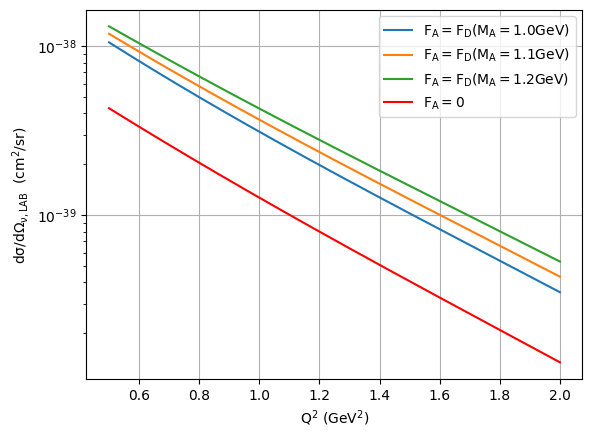

In [25]:
Q_Squared = np.linspace(0.5,2,10000)
csfa = np.zeros(len(Q_Squared))
csfa1 = np.zeros(len(Q_Squared))
csfa2 = np.zeros(len(Q_Squared))
cs_nofa = np.zeros(len(Q_Squared))
# ga = 1.2754
# ma = 1.0 # GeV

for i in range(0, len(Q_Squared)):
  csfa[i] = calculate_cs_from_ff(FA=calculate_FD(ma=1.0, Q_Squared=Q_Squared[i]), Q_Squared=Q_Squared[i])*(10**(-27))
  csfa1[i] = calculate_cs_from_ff(FA=calculate_FD(ma=1.1, Q_Squared=Q_Squared[i]), Q_Squared=Q_Squared[i])*(10**(-27))
  csfa2[i] = calculate_cs_from_ff(FA=calculate_FD(ma=1.2, Q_Squared=Q_Squared[i]), Q_Squared=Q_Squared[i])*(10**(-27))
  cs_nofa[i] = calculate_cs_from_ff(FA=0, Q_Squared=Q_Squared[i])*(10**(-27))

plt.plot(Q_Squared, csfa) # M_A=1.0
plt.plot(Q_Squared, csfa1) # M_A=1.1
plt.plot(Q_Squared, csfa2) # M_A=1.2
plt.plot(Q_Squared,cs_nofa, color='red')
plt.yscale("log")

plt.legend(['$\mathregular{F_A = F_D(M_A = 1.0 GeV)}$', #csfa
            '$\mathregular{F_A = F_D(M_A = 1.1 GeV)}$', #csfa1
            '$\mathregular{F_A = F_D(M_A = 1.2 GeV)}$', #csfa2
            '$\mathregular{F_A = 0}$']) #csnofa

plt.xlabel(r'$\mathregular{Q^2\,\, (GeV^2)}$')
plt.ylabel(r'$\mathregular{d\sigma/d\Omega_{\nu,LAB}\,\,\,\, (cm^2/sr)}$')

plt.grid(True)

# Work (Run functions here!)

In [26]:
kinematics_lab_and_cm(E_initial=2.2, m1=0, m2=0.9383, m3=0.1396, m4=0.9396, Q_Squared=1)

===> Lab Frame <===
	=> Energy <=
	 -> E1:	 2.2
	 -> E2:	 0.9383
	 -> E3:	 1.6658204891825645
	 -> E4:	 1.4724795108174358
	=> Momentum <=
	 -> p_1: 2.2
	 -> p_2: 0.0
	 -> p_3: 1.6599607652533352
	 -> p_4: 1.1337317803506943
	=> Kinetic Energy <=
	 -> KE_1: 2.2
	 -> KE_2: 0
	 -> KE_3: 1.6540802828703443
	 -> KE_4: 0.6344285537215006
	=> Angle (degrees) <=
	 -> Angle of pion: 30.237281892607978
	=> Beta <=
	 -> Beta: 0.7699474064133577
	=> TOF <=
	 -> TOF (m4 particle - 15 meters): 64.98445720182214 ns
	=> Mandelstam Variables <=
	 -> s: 5.008926890000001
	 -> t: -1
	 -> u: -2.2261836800000006
===> Center of Mass Frame <===
	=> Energy (GeV) <=
	 -> Energy (in CM): 2.238063200626828
	 -> E_1 (in CM): 0.922342139141491
	 -> E_2 (in CM): 1.3157210614853367
	 -> E_3 (in CM): 0.9261505414232553
	 -> E_4 (in CM): 1.3119126592035724
	=> Momentum (GeV) <=
	 -> Momentum of CM: 0.9223421391414909
	 -> p_1 (in CM): 0.922342139141491
	 -> p_2 (in CM): 0.922342139141491
	 -> p_3 (in CM): 0.915569039